# Creating Data Visualisations Using Python

Creating data visualisations in Python typically involves three key stages:

1. Loading the dataset
2. Cleaning and shaping the relevant data
3. Visually presenting the insights

> __Note__: We'll explore each of these stages using the [Kickstarter Projects dataset](https://www.kaggle.com/datasets/kemical/kickstarter-projects?select=ks-projects-201801.csv).

## 1. Loading the Dataset

### What happens at this stage?

This is where we import our data into our python environment.

### What are some common data sources?

We can load data stored in common file formats such as `.csv`, `.xlsx`, and `.json`. Data can also be loaded directly from databases.

### Which Python libraries can be used for this task?

- [pandas](https://pandas.pydata.org/docs/) – Used to read data from various file formats and return a DataFrame.
- [openpyxl](https://openpyxl.readthedocs.io/en/stable/#documentation) or [xlrd](https://xlrd.readthedocs.io/en/latest/) – Useful for working with older Excel file formats.
- [sqlalchemy](https://docs.sqlalchemy.org/en/20/) – An Object Relational Mapper (ORM) for Python that allows access to SQL databases and loading of data.

### Can you show us an example?

In [1]:
# Import pandas library
# (documentation) https://www.w3schools.com/python/python_modules.asp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load kickstarter-projects.csv into memory, outputting a pandas DataFrame
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv('../data/kickstarter-projects.csv')

# Print the DataFrame's contents as a sanity check
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 2. Cleaning and Shaping the Dataset

### What happens at this stage?

Here, we identify and extract data relevant to the insights we want to explore. We then clean and structure the data to ensure it is accurate, complete, and ready for analysis or visualisation. This process can include:

- Handling missing values (`df.dropna()`, `df.fillna()`)
- Renaming or selecting specific columns
- Changing data types (e.g., `df['date'] = pd.to_datetime(df['date'])`)
- Filtering or grouping data
- Merging or joining datasets

### What tools and libraries are commonly used?

- [pandas](https://pandas.pydata.org/docs/) – For powerful data manipulation and transformation
- [numpy](https://numpy.org/doc/stable/) – For numerical operations and array-based computations

### Can you show us an example?

First, let's explore the dataset and decide what insights we would like to explore. We will decide to focus on:

1. Which countries crowdfund the most projects?
2. Which project categories are popular?
3. Which projects are least/most successful in terms of achieving their funding goals (by country and project category)?
4. Which projects are least/most successful in terms of overall project success (by country and project category)?
5. Which projects attract the most funding (by country and project category)?
6. Which projects attract the least/most backers (by country and project category)?
  
Next, let's see how complete this dataset is. Let's check for missing values:

In [2]:
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

pd.isnull(df).head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Owing to the dataset's size, it's difficult to indentify at a glance any null values.

We can get a better picture by converting each column to a percentage (null values / all values * 100)

In [3]:
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html

null_percentage_df = (df.isnull().mean() * 100).reset_index()
null_percentage_df.columns = ['Column', 'NullPercentage']
null_percentage_df

,Column,NullPercentage
0,ID,0.000000
1,name,0.001056
2,category,0.000000
3,main_category,0.000000
4,currency,0.000000
5,deadline,0.000000
6,goal,0.000000
7,launched,0.000000
8,pledged,0.000000
9,state,0.000000


With this, we can see that the majority of the DataFrame's columns are complete i.e., contain a non-null value.

This also identifies the columns for which we will need to handle null values, namely `name` and `usd pledged`.

For the insights we are interested in, the project's name has no bearing on accuracy. We are interested in success metrics centered around project category, country, whether or not the project met its pledge goals and whether it was a success or failure overall. All columns providing this information are complete. Based on this, we will decide to keep records missing a project name.

We will also decide to keep records that are missing values in the `usd pledged` column, given that there are other columns that are complete and offer the same information.

For completeness though, let's say this wasn't the case and we decide to drop all records that are missing value in the `name` column. How would we do that?


In [4]:
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

# Drop any rows having a null value in the `name` column:

df_name_null_dropped = df.dropna(subset=['name']) 

# Observe the number of rows affected by outputting the shape of the original and updated data:

print(f'Original data shape: {df.shape}')
print(f'Updated data shape: {df_name_null_dropped.shape}')

# Confirm that the affected number of rows is correct by:

print(f'Rows affected: {df.shape[0] * 0.001056 / 100}') # Calculating (column total values) * (percentage null values)
df[df['name'].isnull()] # Selecting the rows where `name` column values are null

Original data shape: (378661, 15)
Updated data shape: (378657, 15)
Rows affected: 3.9986601600000005


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


One of the datapoints we are intersted in exploring is whether or not a project was a success overall, and we will use the `state` column to determine this. In its original form, the dataset categorises project `state` as one of `undefined`, `cancelled`, `failed`, `suspended`, `successful`, and `live`. This can be observed by selecting the unique values from this column:

In [5]:
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.unique.html

df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

Since we are only interested in overall success, we will decide to convert this column's values to boolean values, where `True` and `False` represent success and failure, respectively. In this case, we will decide the following:

- Values of `undefined`, `cancelled`, `failed`, and `suspended` will be coerced to `False`.
- Values of `successful` and `live` will be coerced to `True`.

We can create a new column based on this information using:

In [6]:
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
# (documentation) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html

# Crate new column called `success`, having values `True` or `False` based on `state` column value

df['success'] = np.where(df['state'].isin(['successful', 'live']), True, False)

# Check that the values have mapped correctly based on `state` column values

df[df['state'].isin(['success', 'live'])].head()
# df[df['state'].isin(['undefined', 'candeled', 'failed', 'suspened'])]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.0,live,24,CA,185.65,472.88,2396.36,True
183,1000761521,KILOS.,Thrillers,Film & Video,USD,2018-02-06,5000.0,2017-12-23 20:34:31,310.0,live,4,US,200.00,310.00,5000.00,True
458,1002183790,The Man in the Field,Horror,Film & Video,GBP,2018-01-08,850.0,2017-12-21 11:19:18,413.0,live,11,GB,13.39,563.32,1159.38,True
537,1002599057,Dear Atlantas,Film & Video,Film & Video,USD,2018-02-16,2000.0,2017-12-18 02:48:27,5.0,live,1,US,5.00,5.00,2000.00,True
544,1002629894,Art Calendar 2018,Illustration,Art,MXN,2018-01-06,1000.0,2017-12-21 05:34:12,0.0,live,0,MX,0.00,0.00,52.32,True


> __Note__: Although it isn't the case for this dataset, something we might need to consider for the insights we are focussing on is currency conversion. With this dataset, the conversion has been normalised around `usd`, namely the `usd_pledged_real` and `usd_goal_real_columns`.

Now, let's create a separate table containing our cleaned data, having only the columns that are useful for the insights we are exploring:

In [7]:
df_cleaned = pd.DataFrame(df[['main_category', 'category', 'country', 'usd_pledged_real', 'usd_goal_real', 'backers', 'success']])
df_cleaned.columns = ['Main Category', 'Sub Category', 'Country', 'Funding Pledged (USD)', 'Funding Goal (USD)', 'Backers', 'Success']
df_cleaned['Funding Percentage Achieved'] = (df_cleaned['Funding Pledged (USD)'] / df_cleaned['Funding Goal (USD)']) * 100
df_cleaned.head()

,Main Category,Sub Category,Country,Funding Pledged (USD),Funding Goal (USD),Backers,Success,Funding Percentage Achieved
0,Publishing,Poetry,GB,0.0,1533.95,0,False,0.000000
1,Film & Video,Narrative Film,US,2421.0,30000.00,15,False,8.070000
2,Film & Video,Narrative Film,US,220.0,45000.00,3,False,0.488889
3,Music,Music,US,1.0,5000.00,1,False,0.020000
4,Film & Video,Film & Video,US,1283.0,19500.00,14,False,6.579487


## 3. Visually Presenting the Insights

### What happens at this stage?

This is where we use our cleaned and prepared data to create visual representations—such as charts and graphs—that help communicate our insights effectively.

### Which libraries are commonly used for data visualisation?

- [matplotlib](https://matplotlib.org/stable/index.html) – A foundational plotting library that provides fine-grained control, though it can be more verbose.
- [seaborn](https://seaborn.pydata.org/tutorial.html) – Built on top of matplotlib, it offers a higher-level interface for creating statistical graphics.
- [plotly](https://plotly.com/python/) – Allows creation of rich interactive and web-based visualisations.
- [pandas](https://pandas.pydata.org/docs/) – Offers built-in plotting capabilities via `.plot()`.

### Can you show us an example?

Let's remind ourselves of which insights we are interested in exploring:

1. Which countries crowdfund the most projects?
2. Which project categories are popular?
3. Which projects are least/most successful in terms of achieving their funding goals (by country and project category)?
4. Which projects are least/most successful in terms of overall project success (by country and project category)?
5. Which projects attract the most funding (by country and project category)?
6. Which projects attract the least/most backers (by country and project category)?

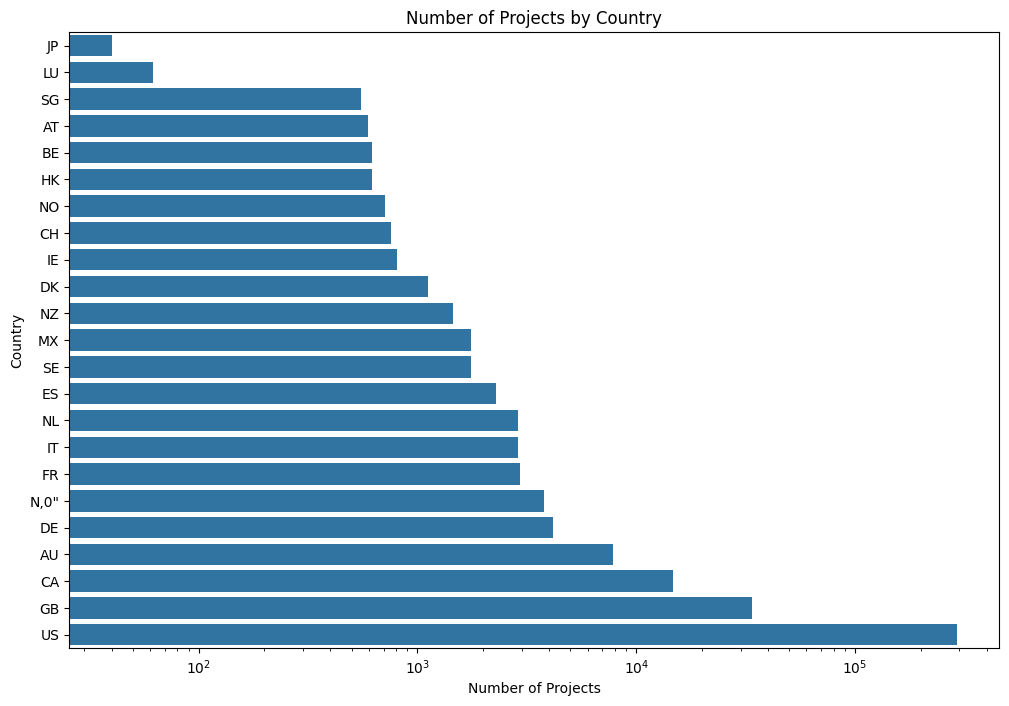

In [8]:
df_country_projects = pd.DataFrame(df_cleaned.groupby('Country')['Success'].count())
df_country_projects.rename(columns={'Success': 'Number of Projects'}, inplace=True)
df_country_projects.sort_values(by='Number of Projects', inplace=True)
df_country_projects = df_country_projects.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(df_country_projects, x='Number of Projects', y='Country')
plt.xscale('log')
plt.title("Number of Projects by Country")
plt.show()

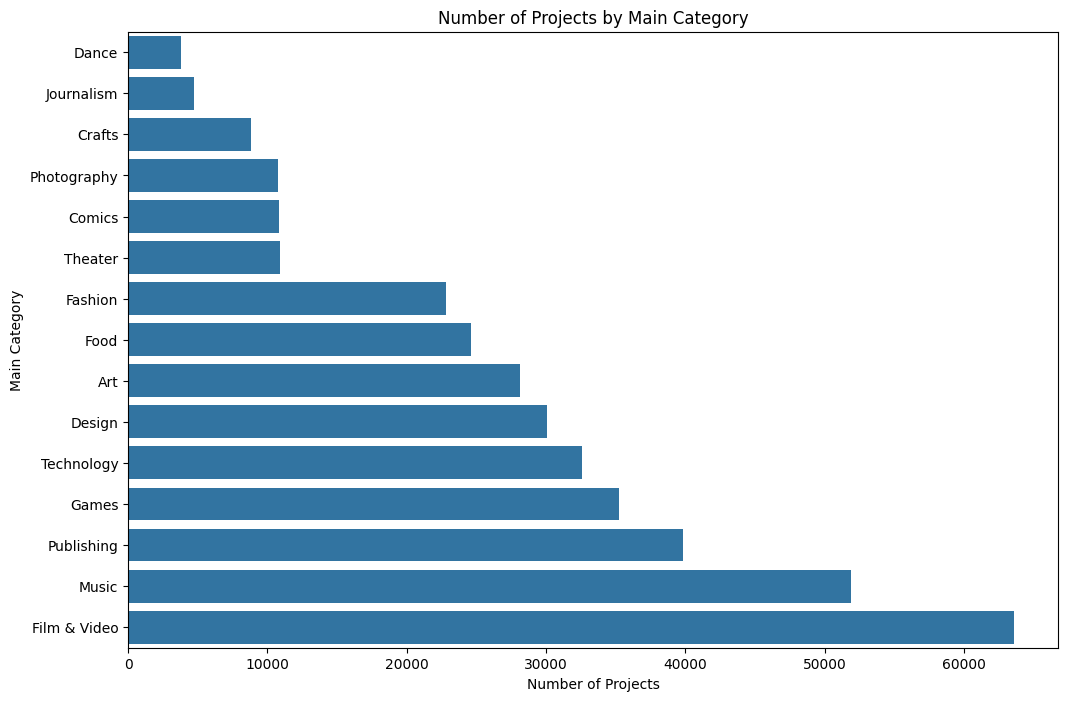

In [9]:
df_category_count = pd.DataFrame(df_cleaned.groupby('Main Category')['Success'].size())
df_category_count.rename(columns={'Success': 'Number of Projects'}, inplace=True)
df_category_count.sort_values(by='Number of Projects', inplace=True)
df_category_count = df_category_count.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(df_category_count, x='Number of Projects', y='Main Category')
plt.title("Number of Projects by Main Category")
plt.show()

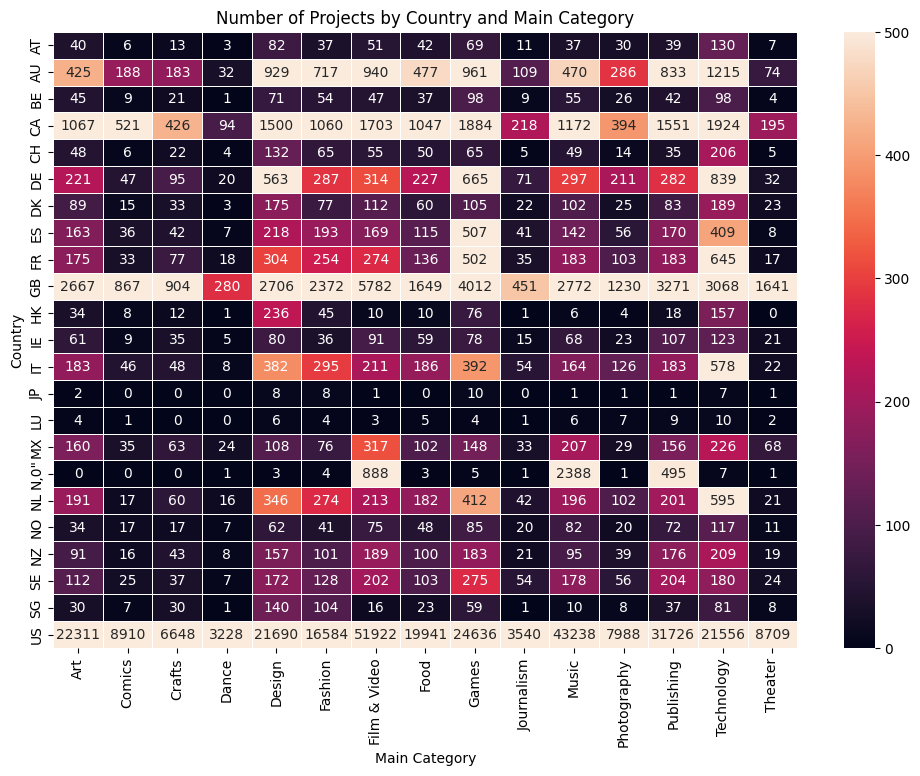

In [10]:
# Count number of projects per Country and Main Category
df_main_category_counts = df_cleaned.groupby(['Country', 'Main Category']).size().reset_index(name='Count')

# Pivot to wide format for heatmap
df_pivot = df_main_category_counts.pivot(index='Country', columns='Main Category', values='Count')
df_pivot.fillna(0, inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, linewidths=0.5, annot=True, fmt='.0f', vmax=500)
plt.title("Number of Projects by Country and Main Category")
plt.show()

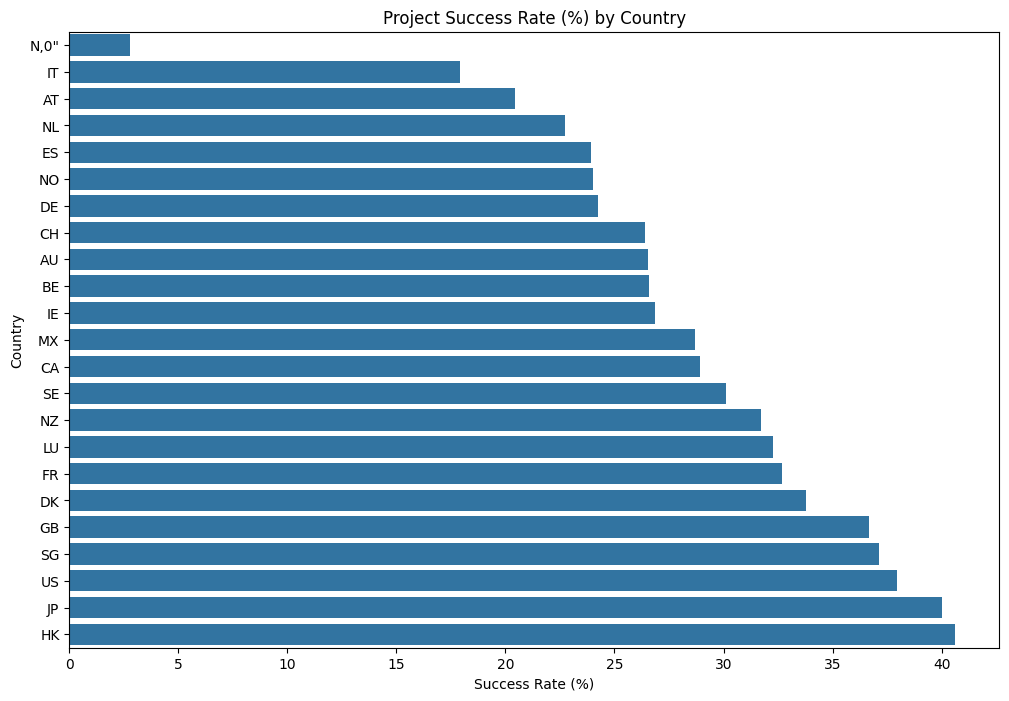

In [11]:
df_country_success_rate = pd.DataFrame(df_cleaned.groupby('Country')['Success'].mean() * 100)
df_country_success_rate.rename(columns={'Success': 'Success Rate (%)'}, inplace=True)
df_country_success_rate.sort_values(by='Success Rate (%)', inplace=True)
df_country_success_rate = df_country_success_rate.reset_index()
df_country_success_rate

plt.figure(figsize=(12, 8))
sns.barplot(
    df_country_success_rate,
    y='Country',
    x='Success Rate (%)'
)
plt.title("Project Success Rate (%) by Country")
plt.show()

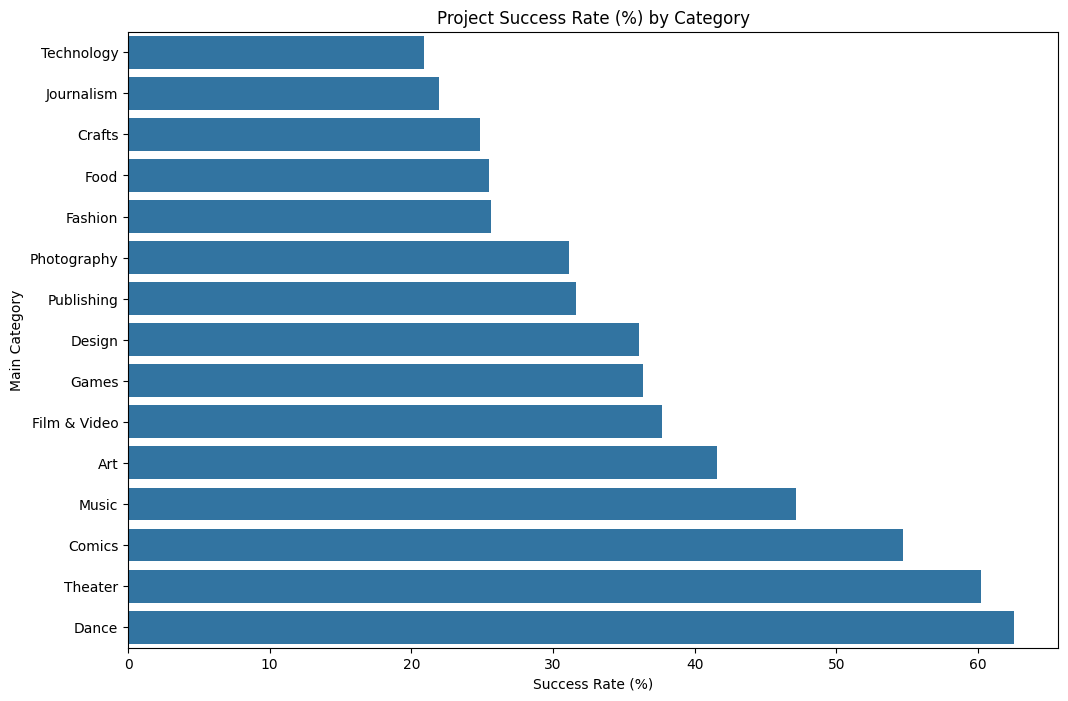

In [12]:
df_category_success_rate = pd.DataFrame(df_cleaned.groupby('Main Category')['Success'].mean() * 100)
df_category_success_rate.rename(columns={'Success': 'Success Rate (%)'}, inplace=True)
df_category_success_rate.sort_values(by='Success Rate (%)', inplace=True)
df_category_success_rate = df_category_success_rate.reset_index()
df_category_success_rate

plt.figure(figsize=(12, 8))
sns.barplot(
    df_category_success_rate,
    y='Main Category',
    x='Success Rate (%)'
)
plt.title("Project Success Rate (%) by Category")
plt.show()

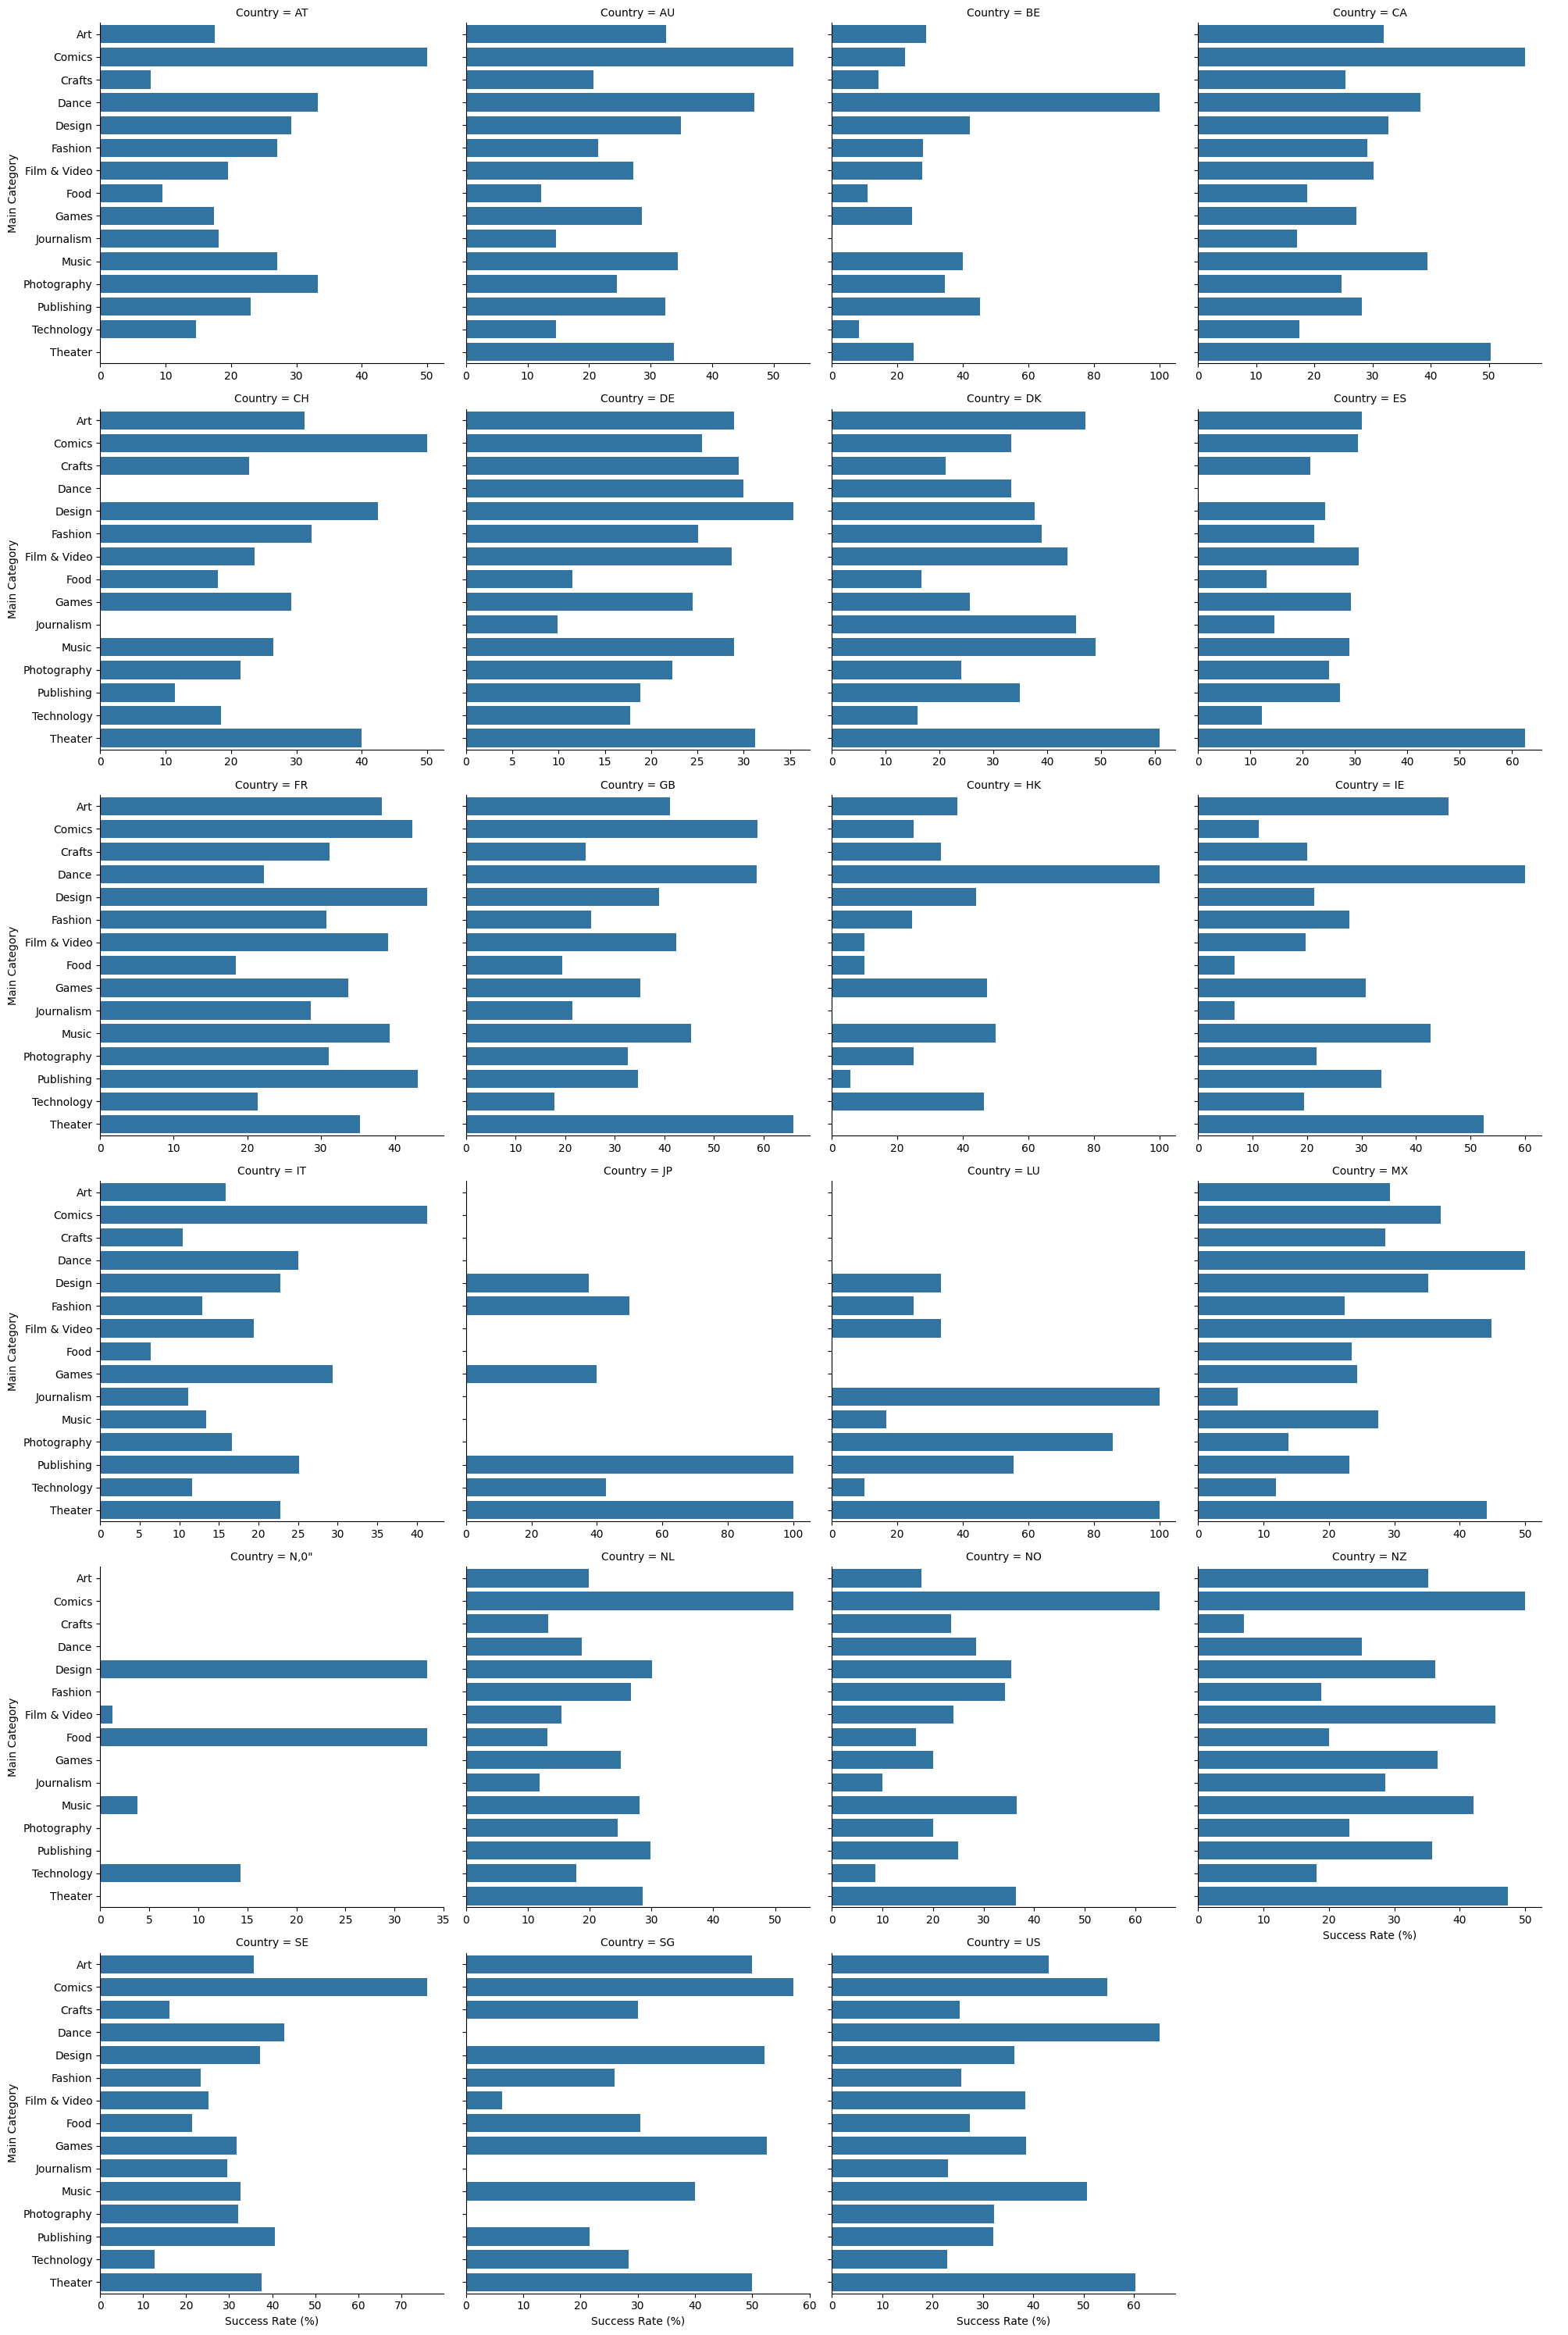

In [43]:
df_country_category_success_rate = (
    df_cleaned
    .groupby(['Country', 'Main Category'])['Success']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'Success': 'Success Rate (%)'})
)

sns.catplot(
    y='Main Category', 
    x='Success Rate (%)', 
    col='Country', 
    data=df_country_category_success_rate, 
    kind='bar', 
    errorbar=None,
    col_wrap=4,
    sharex=False,
    sharey=True
)
